In [19]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pickle
# from sklearn.metrics import confusion_matrix,f1_score,accuracy_score
from sklearn import metrics
import operator

In [2]:
with open("per_location_models","rb") as file:
    model=pickle.load(file)

In [103]:
result = {}
result2 ={}
for key in model.keys():
    list_ ={}
    list_2 ={}
    for key2 in model[key].keys():
        y_pred= model[key][key2]["estimator"].predict(model[key][key2]["X_test"])
        y_test= model[key][key2]["y_test"]
        accuracy_sc=metrics.accuracy_score(y_test, y_pred)
        f1_sc=metrics.f1_score(y_test, y_pred)
        list_[key2]=f1_sc
        list_2[key2]=accuracy_sc
    result[key]=list_
    result2[key]=list_2

In [104]:
df_result=pd.DataFrame(result)
df_result2=pd.DataFrame(result2)

In [105]:
df_f1=pd.DataFrame(df_result.unstack()).reset_index().rename(columns={"level_0":"Location","level_1":"model",0:"f1_score"})
df_acc=pd.DataFrame(df_result2.unstack()).reset_index().rename(columns={"level_0":"Location","level_1":"model",0:"acc_score"})

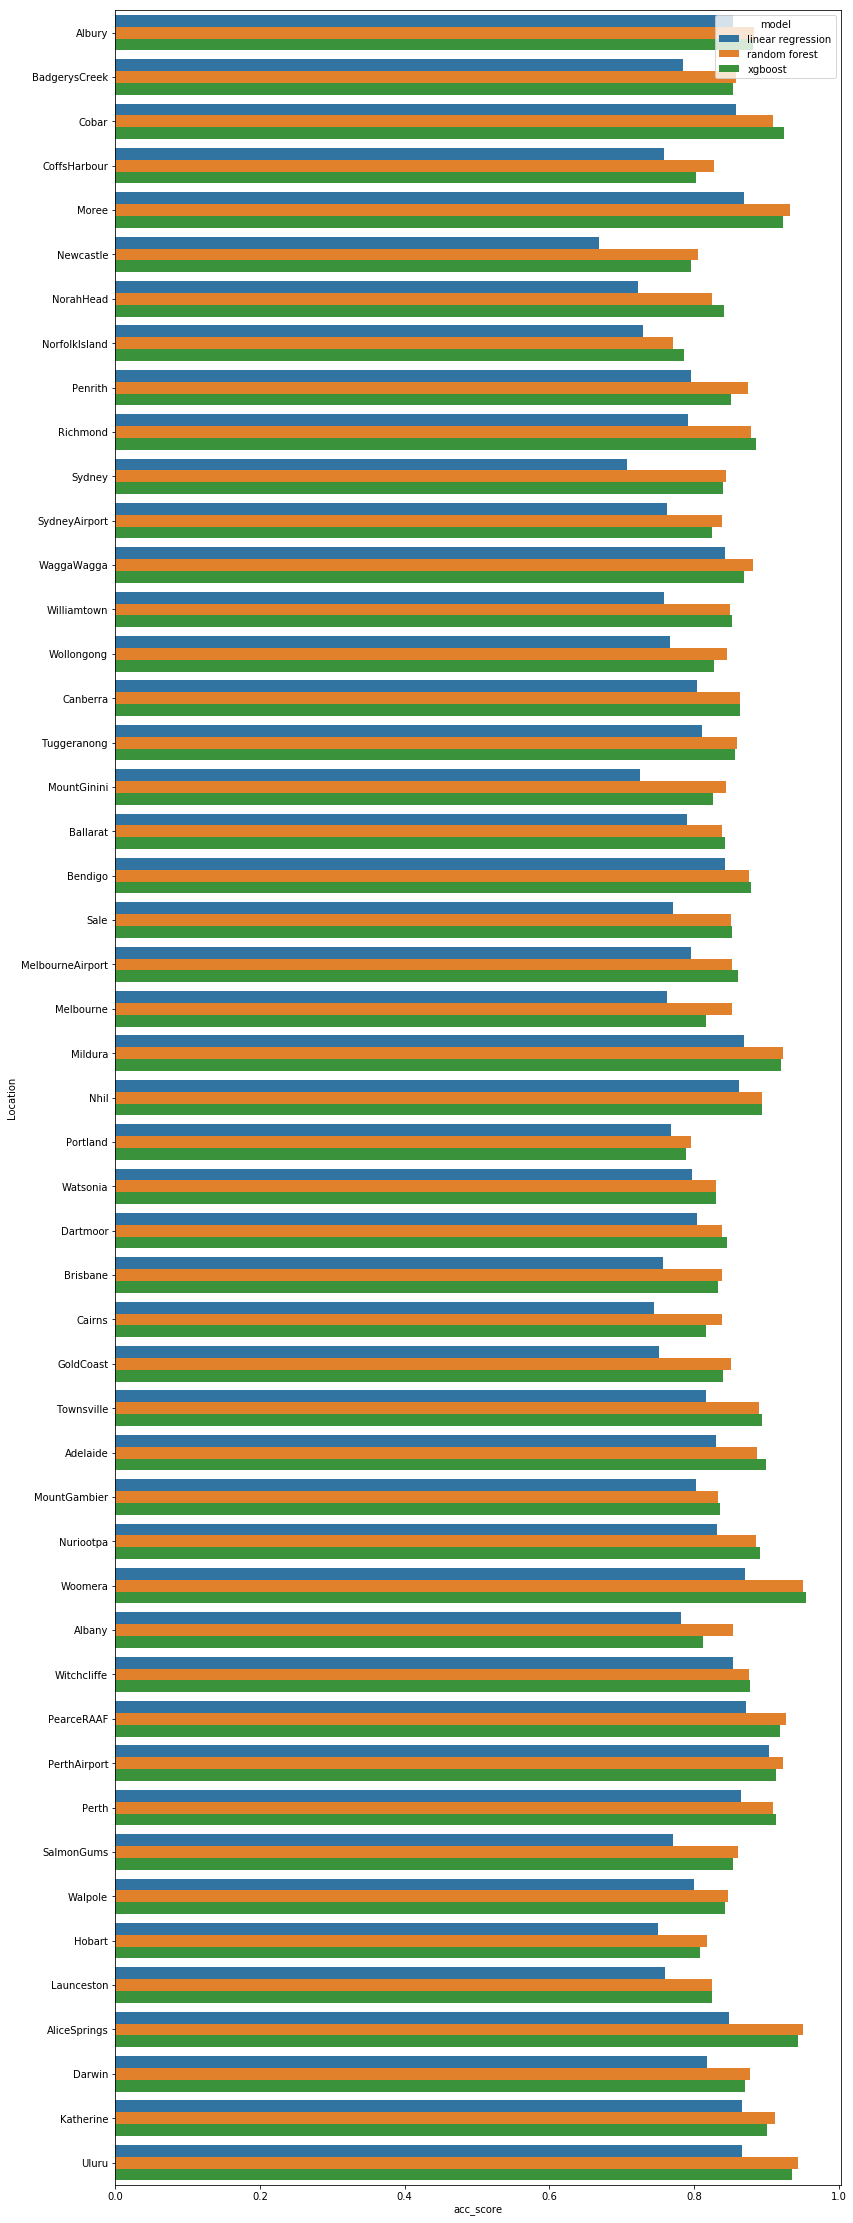

In [100]:
plt.figure(figsize=(13,40))
sb.barplot(y="Location",x="acc_score",data=df_acc,hue="model")

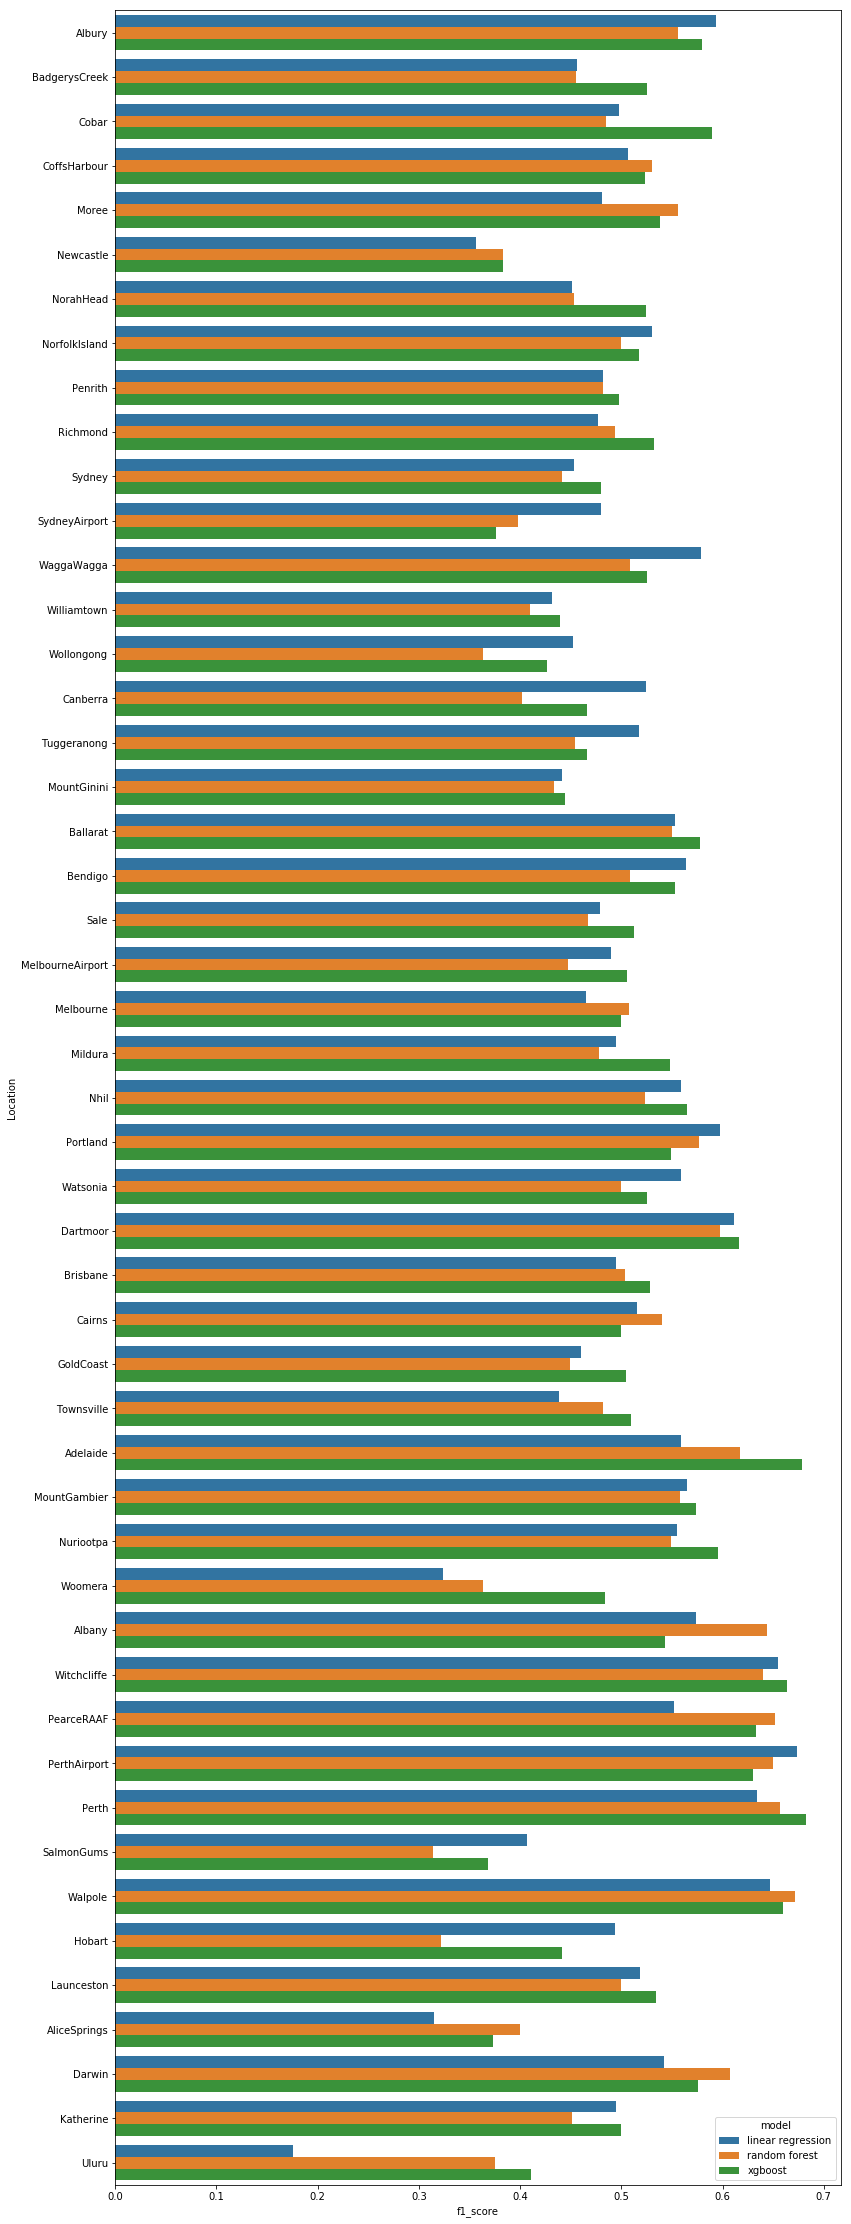

In [107]:
plt.figure(figsize=(13,40))
sb.barplot(y="Location",x="f1_score",data=df_f1,hue="model")

In [127]:
final={}
for key in model.keys():
    final[key]={"estimator":model["Albury"][max(result[key].items())[0]]["estimator"],"scaler":model["Albury"][max(result[key].items())[0]]["scaler"]}

In [128]:
with open("best_models_per_loc","wb") as file:
    pickle.dump(final,file)